In [1]:
#Aplicando o modelo de Regressão Logística no Dataset de Variáveis Numéricas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Data_NumandCat = pd.read_csv('Dataset_Num_Cat.csv')

In [4]:
Data_NumandCat

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Result Test COVID
0,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,0,0,0,0,0,0,0,0,0,0
1,9,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,...,0,0,0,1,0,0,0,0,1,0
2,9,-0.679027,-0.711556,0.952319,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,-0.710443,...,0,0,0,0,0,0,0,0,0,0
3,16,0.671398,0.290940,0.135801,0.525133,0.173372,-1.249524,-0.653951,0.081693,-0.501356,...,0,0,0,0,0,0,0,1,0,0
4,9,-0.656139,-0.899524,-0.391795,-0.409276,1.862123,-1.149948,-0.681779,-0.529226,-0.919529,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,11,-0.450142,0.040316,-0.492289,-0.409276,-1.378914,1.936978,0.038964,-0.529226,0.805435,...,0,0,0,0,0,0,0,0,0,1
95,0,-2.418559,-2.152643,0.952319,-1.237902,-1.694489,0.642463,4.224283,-1.140144,-1.808146,...,0,0,0,0,0,0,0,1,0,0
96,0,-1.182576,-0.836868,-0.693278,-0.462168,-0.671003,1.239930,0.495342,-1.140144,-0.710443,...,0,0,0,0,0,0,0,0,0,0
97,12,1.152058,0.604220,-0.529975,0.930631,-0.679533,-1.647838,-0.662300,0.081693,-0.658171,...,0,0,0,0,0,0,0,0,0,1


In [5]:
Data_NumandCat['Result Test COVID'].sum()

13

In [6]:
#Dividindo meu Dataset em Treinamento e Teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Data_NumandCat.drop('Result Test COVID',axis=1), 
                                                    Data_NumandCat['Result Test COVID'], test_size=0.30, 
                                                    random_state=101)

In [9]:
#Treinamento e Predição

In [10]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [11]:
predictions = logmodel.predict(X_test)

In [12]:
#Resultado

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.40      0.40      0.40         5

    accuracy                           0.80        30
   macro avg       0.64      0.64      0.64        30
weighted avg       0.80      0.80      0.80        30



In [15]:
print(confusion_matrix(y_test,predictions))

[[22  3]
 [ 3  2]]


In [16]:
# get importance

importance = logmodel.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print(str(list(Data_NumandCat.columns.values)[i]) + ' Score: %.5f' % (v))


Patient age quantile Score: 0.12337
Hematocrit Score: 0.07098
Hemoglobin Score: 0.07982
Platelets Score: -0.17702
Red blood Cells Score: -0.02327
Lymphocytes Score: -0.39796
Mean corpuscular hemoglobin concentration (MCHC) Score: 0.14289
Leukocytes Score: -1.22951
Basophils Score: 0.24559
Mean corpuscular hemoglobin (MCH) Score: 0.18691
Eosinophils Score: -0.55137
Mean corpuscular volume (MCV) Score: 0.21223
Monocytes Score: 0.35273
Red blood cell distribution width (RDW) Score: -0.18024
Respiratory Syncytial Virus Score: -0.01868
Influenza A Score: 0.00000
Influenza B Score: -0.30123
Parainfluenza 1 Score: 0.00000
CoronavirusNL63 Score: -0.18708
Rhinovirus/Enterovirus Score: -0.86277
Coronavirus HKU1 Score: 0.00000
Parainfluenza 3 Score: 0.00000
Chlamydophila pneumoniae Score: 0.00000
Adenovirus Score: 0.00000
Parainfluenza 4 Score: 0.00000
Coronavirus229E Score: 0.00000
CoronavirusOC43 Score: -0.58288
Inf A H1N1 2009 Score: -0.80941
Bordetella pertussis Score: 0.00000
Metapneumovirus

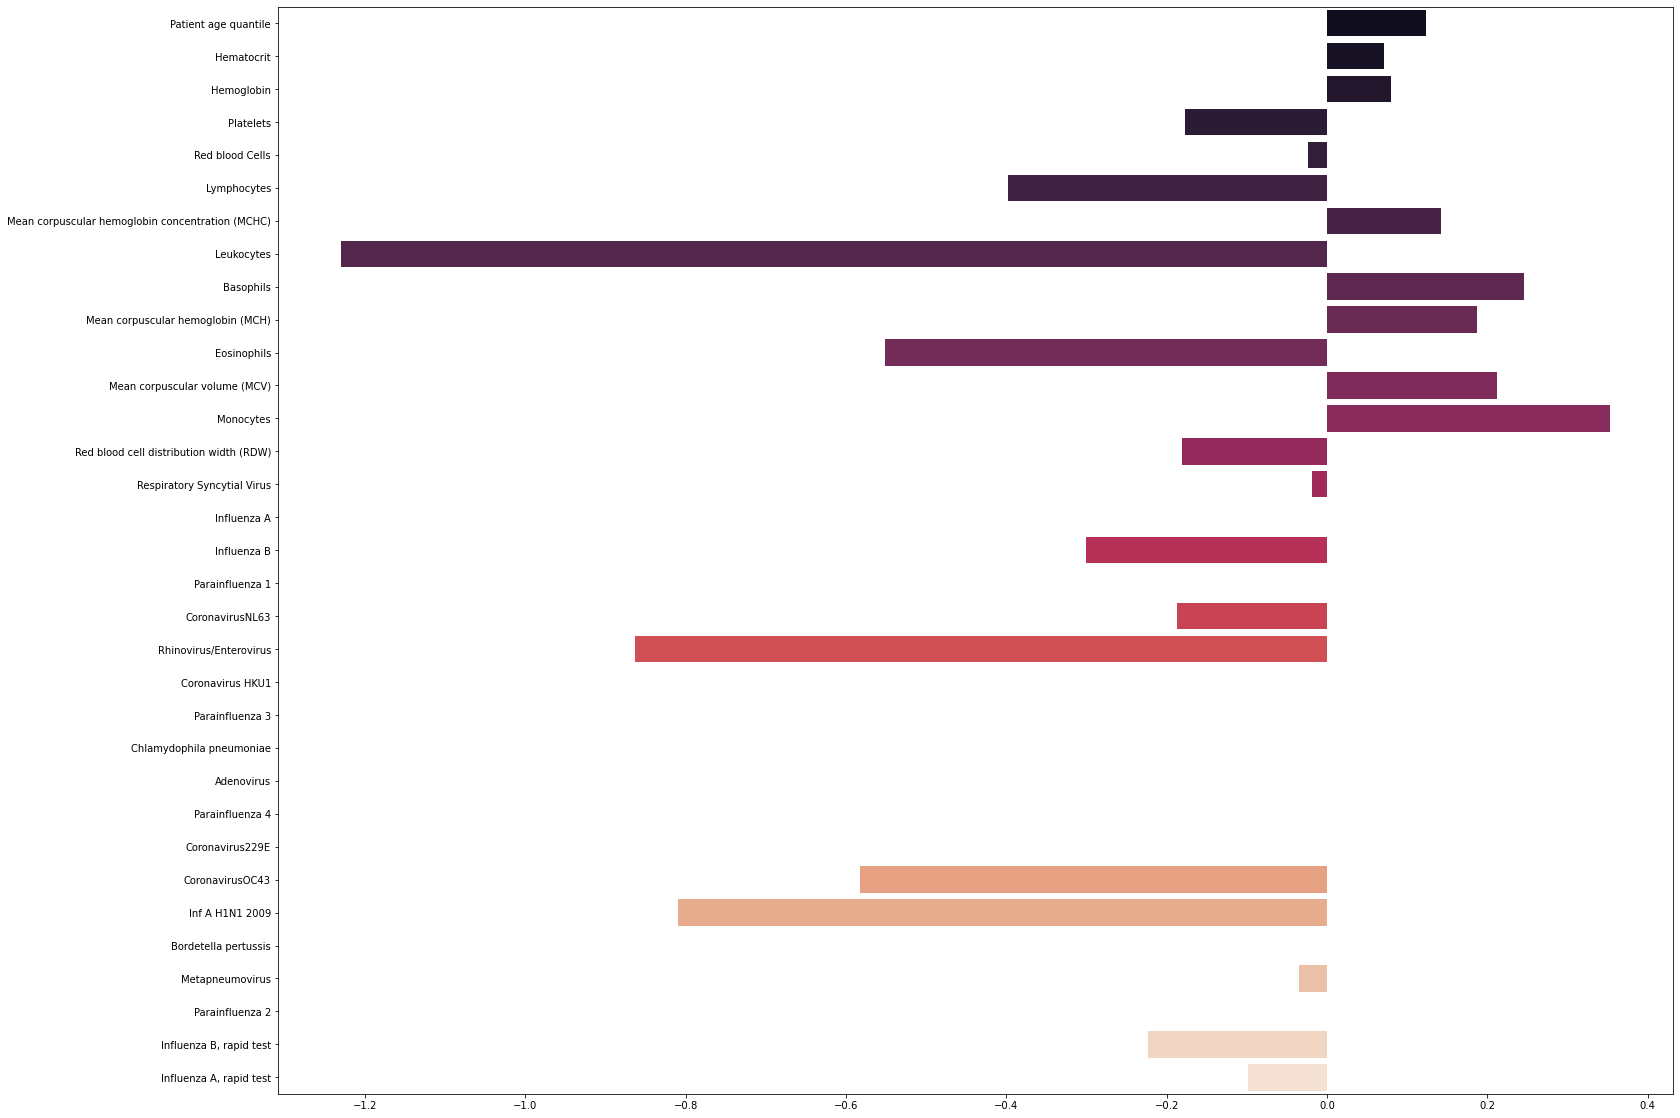

In [17]:
plt.figure(figsize=(25,20))
sns.barplot(y=[str(list(Data_NumandCat.columns.values)[y]) for y in range(len(importance))], x=importance, palette="rocket",orient="h")